In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
tbids = []

# gold and system dep counts
gold_deps = []
system_deps = []

diffs = []

with open("../metadata.csv") as f:
    for i, line in enumerate(f):
        # skip header
        if i >= 1:
            items = line.split(",")
            tbid = items[0]
            
            gold_d = items[4]
            system_d = items[5]
            gold_d = float(gold_d.split("%")[0]) * 100
            system_d = float(system_d.split("%")[0]) * 100
            diff = gold_d - system_d
            
            if diff < 0:
                print("parser predicted less edges for {}".format(tbid))
        
            tbids.append(tbid)
            gold_deps.append(gold_d)
            system_deps.append(system_d)
            diffs.append(diff)

parser predicted less edges for en_ewt
parser predicted less edges for fi_tdt
parser predicted less edges for fr_sequoia
parser predicted less edges for it_isdt
parser predicted less edges for pl_lfg
parser predicted less edges for ru_syntagrus
parser predicted less edges for sv_talbanken
parser predicted less edges for ta_ttb
parser predicted less edges for uk_iu


In [3]:
print(tbids)
print(gold_deps)
print(system_deps)
print(diffs)

assert len(tbids) == len(gold_deps) == len(system_deps) == len(diffs), "error: something wasn't appended"

['ar_padt', 'bg_btb', 'cs_cac', 'cs_fictree', 'cs_pdt', 'en_ewt', 'et_edt', 'fi_tdt', 'fr_sequoia', 'it_isdt', 'nl_alpino', 'nl_lassysmall', 'lv_lvtb', 'lt_alksnis', 'pl_lfg', 'pl_pdb', 'ru_syntagrus', 'sk_snk', 'sv_talbanken', 'ta_ttb', 'uk_iu']
[2997000.0, 1613100.0, 1185000.0, 1754300.0, 18378800.0, 2611800.0, 4876700.0, 2300500.0, 1049200.0, 1083700.0, 1154700.0, 1208600.0, 2844500.0, 1173200.0, 1347900.0, 3576600.0, 12247300.0, 1368400.0, 2165400.0, 203500.0, 1833300.0]
[2914700.0, 1612100.0, 1184800.0, 1749500.0, 18300900.0, 2612300.0, 4848800.0, 2326800.0, 1051600.0, 1086800.0, 1145400.0, 1203400.0, 2788600.0, 1162300.0, 1349600.0, 3512900.0, 12276500.0, 1361800.0, 2165800.0, 205700.0, 1861200.0]
[82300.0, 1000.0, 200.0, 4800.0, 77900.0, -500.0, 27900.0, -26300.0, -2400.0, -3100.0, 9300.0, 5200.0, 55900.0, 10900.0, -1700.0, 63700.0, -29200.0, 6600.0, -400.0, -2200.0, -27900.0]


### Bar plot

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 10.})

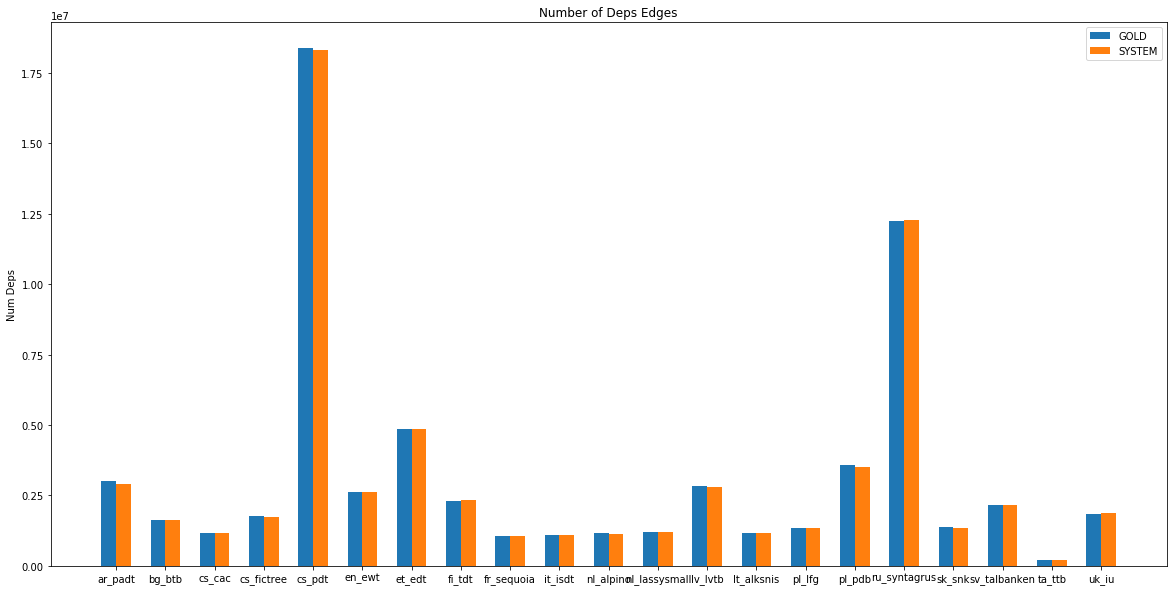

In [10]:
N = len(tbids)

ind = np.arange(N) 
width = 0.3   
plt.bar(ind, gold_deps, width, label='GOLD')
plt.bar(ind + width, system_deps, width, label='SYSTEM')

plt.ylabel('Num Deps')
plt.title('Number of Deps Edges')

plt.xticks(ind + width / 2, tbids)
plt.legend(loc='best')
plt.savefig('deps_gold_system.png')
plt.show()

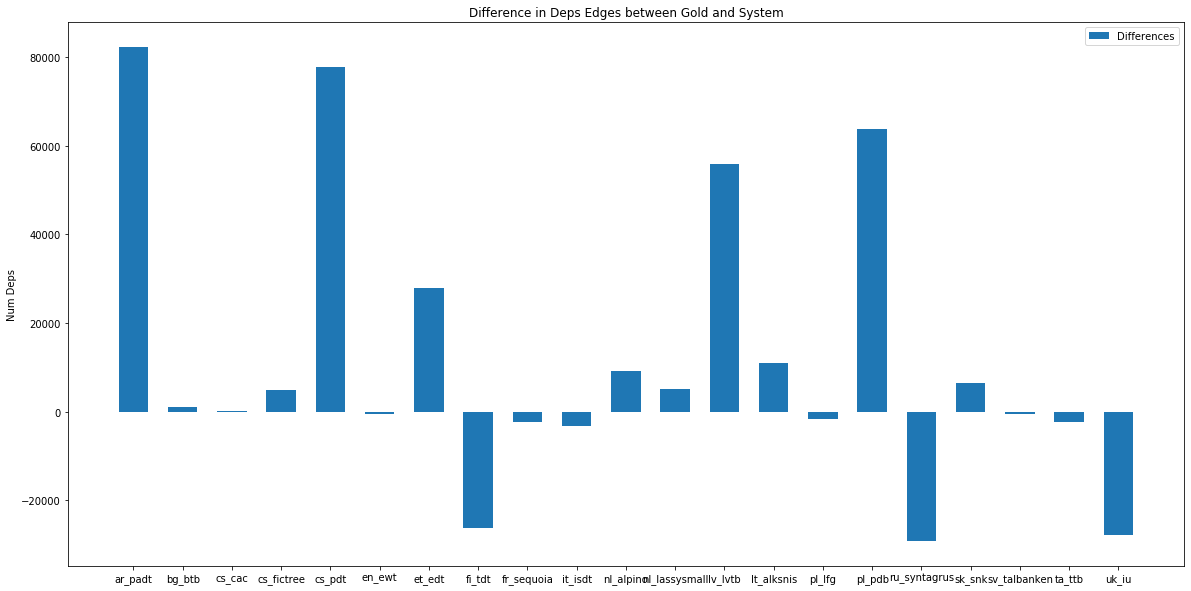

In [14]:
N = len(tbids)

ind = np.arange(N) 
width = 0.6    
plt.bar(ind, diffs, width, label='Differences')

plt.ylabel('Difference Deps')
plt.title('Difference in Deps Edges between Gold and System')
plt.xticks(ind, tbids)
plt.legend(loc='best')
plt.savefig('deps_difference.png')
plt.show()